In [1]:
import eventstudy as es
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas as pd

# 检测输入数据

In [2]:
BSE = yf.download('MME=F', '2022-01-01', '2022-08-22')['Close']
ITC = yf.download('^BSESN', '2022-01-01', '2022-08-22')['Close']
print(type(BSE))
BSE

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.series.Series'>


Date
2022-01-03    1235.199951
2022-01-04    1230.400024
2022-01-05    1210.800049
2022-01-06    1216.599976
2022-01-07    1228.000000
                 ...     
2022-08-15    1019.000000
2022-08-16    1019.599976
2022-08-17    1015.099976
2022-08-18    1008.400024
2022-08-19     994.900024
Name: Close, Length: 159, dtype: float64

In [3]:
# to calcualte the return fo teh ITC and BSE sensex
ITC = ITC.pct_change()
BSE = BSE.pct_change()
ITC= pd.DataFrame(ITC)
BSE = pd.DataFrame(BSE)
BSE =BSE.dropna(axis=0)
ITC =ITC.dropna(axis=0)

# To have equal counts in ITC & BSE
df = ITC['Close'],BSE['Close']
df1 = pd.DataFrame(df)
df2 = df1.T
df2.columns = ['ITC','BSE']
df3 = df2.dropna()
df3

,ITC,BSE
Date,,
2022-01-04,0.011367,-0.003886
2022-01-05,0.006135,-0.015930
2022-01-06,-0.010317,0.004790
2022-01-07,0.002396,0.009370
2022-01-10,0.010896,-0.000081
...,...,...
2022-08-12,0.002194,0.010653
2022-08-16,0.006381,0.000589
2022-08-17,0.006984,-0.004413


# 模拟输入数据

In [4]:
###todo：数据要求
###todo：交易日期为 index，每一列的 column name 为股票代码，每一列是 close【收盘价】的percentage changed【百分比变化，相对于前一天】
stockData=pd.read_csv("stockData/TushareRawData.csv")
stockData=stockData[['ts_code','trade_date','pct_chg']].rename(columns={'trade_date':'date'})
# companyList=[]
afterColumnChanged=pd.DataFrame()
# print("total number of day: {}".format(len(stockData['Date'].values)))
# for stockCode in list(stockData.groupby('ts_code')):
#     theData={'Date':stockCode[1]['Date'].values,stockCode[0]:stockCode[1]['pct_chg'].values}
#     dataByCompany=pd.DataFrame(theData)
#     dataByCompany['Date']=pd.to_datetime(dataByCompany["Date"], format="%Y-%m-%d")
#     dataByCompany=dataByCompany.dropna(axis=1)
#     # dataByCompany=dataByCompany.set_index('Date')
#     # afterColumnChanged=afterColumnChanged.append(dataByCompany)
#     companyList.append(dataByCompany)
#     # afterColumnChanged=pd.concat([afterColumnChanged,dataByCompany])
#     # print("{} is finished".format(stockCode[0]))
#
# afterColumnChanged=pd.concat(companyList[:100])
# # afterColumnChanged=afterColumnChanged.drop_duplicates()
# afterColumnChanged=afterColumnChanged.sort_values(by='Date',ascending=False)
# # afterColumnChanged=afterColumnChanged.dropna(how='all')
stockData['date']=pd.to_datetime(stockData["date"], format="%Y-%m-%d")
# stockData['pct_chg']=stockData['pct_chg'].astype(float)
stockData=stockData.set_index('date')
# dt = datetime.datetime(2022, 12, 30)
# # for ele in afterColumnChanged[afterColumnChanged['Date']==dt].values:
# #     print(ele)
# afterColumnChanged

for stockCode in stockData.groupby('ts_code'):
    # if len(stockCode[1]['pct_chg'].values) >= 1000:
    afterColumnChanged[stockCode[0]]=stockCode[1]['pct_chg']

# afterColumnChanged=afterColumnChanged.replace(np.nan,0)
afterColumnChanged

C:\Users\87066\AppData\Local\Temp\ipykernel_21484\2822334387.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  afterColumnChanged[stockCode[0]]=stockCode[1]['pct_chg']
C:\Users\87066\AppData\Local\Temp\ipykernel_21484\2822334387.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  afterColumnChanged[stockCode[0]]=stockCode[1]['pct_chg']
C:\Users\87066\AppData\Local\Temp\ipykernel_21484\2822334387.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,872392.BJ,872808.BJ,872925.BJ,873001.BJ,873122.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,0.9977,0.2203,1.2552,0.5405,2.7732,0.0000,0.4367,0.9182,3.5912,1.0462,...,-2.5,2.3968,2.1127,0.5618,0.0000,0.0000,0.6270,0.6965,1.2121,-0.3713
2022-12-29,-0.8371,-2.2605,0.1047,-0.5376,-9.9853,-0.7653,-0.8658,-0.5809,-3.7234,-4.8922,...,NaN,0.4073,0.0000,-1.6575,-2.7539,-0.5017,-2.4465,-0.9852,-1.0000,0.2481
2022-12-28,0.2288,0.3782,-1.5464,-1.5873,2.5602,0.0000,-1.2821,-1.7129,-2.5907,1.0897,...,NaN,-0.1848,-0.7687,-7.2983,-0.0860,0.5042,-2.3881,-1.4563,-0.7937,0.1242
2022-12-27,2.6625,0.7621,2.5370,2.7174,9.9338,-0.3812,0.8621,-2.8526,0.5208,2.1404,...,NaN,-0.4781,-0.3482,-8.3333,-0.1717,0.0000,0.6006,2.7944,-0.1980,-0.1241
2022-12-26,-1.6179,-2.1832,1.2848,0.0000,2.1997,-0.6313,0.8696,1.2029,3.7838,-0.8489,...,NaN,-0.4029,0.6307,NaN,4.0000,0.6768,0.0000,-0.5952,-0.3945,0.1242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-10,0.0600,NaN,-0.4800,0.3400,1.0000,6.5300,0.6400,0.0000,NaN,0.2800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-09,-0.8800,NaN,0.0000,0.0000,-1.3800,-0.3900,1.4700,1.7000,NaN,-1.1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,-1.8400,NaN,1.1000,0.3400,3.2500,8.0100,1.5900,-0.4500,NaN,0.7100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# afterColumnChanged.to_csv("eventStudyData/train/incomeImport.csv",sep=',',index =True)

In [6]:
afterColumnChanged=pd.read_csv("eventStudyData/train/incomeImport.csv",index_col="date")
afterColumnChanged.index=pd.DatetimeIndex(afterColumnChanged.index)
print(afterColumnChanged.index.dtype)
print(afterColumnChanged['000001.SZ'].dtypes)
afterColumnChanged

datetime64[ns]
float64


,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,872392.BJ,872808.BJ,872925.BJ,873001.BJ,873122.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,0.9977,0.2203,1.2552,0.5405,2.7732,0.0000,0.4367,0.9182,3.5912,1.0462,...,-2.5,2.3968,2.1127,0.5618,0.0000,0.0000,0.6270,0.6965,1.2121,-0.3713
2022-12-29,-0.8371,-2.2605,0.1047,-0.5376,-9.9853,-0.7653,-0.8658,-0.5809,-3.7234,-4.8922,...,NaN,0.4073,0.0000,-1.6575,-2.7539,-0.5017,-2.4465,-0.9852,-1.0000,0.2481
2022-12-28,0.2288,0.3782,-1.5464,-1.5873,2.5602,0.0000,-1.2821,-1.7129,-2.5907,1.0897,...,NaN,-0.1848,-0.7687,-7.2983,-0.0860,0.5042,-2.3881,-1.4563,-0.7937,0.1242
2022-12-27,2.6625,0.7621,2.5370,2.7174,9.9338,-0.3812,0.8621,-2.8526,0.5208,2.1404,...,NaN,-0.4781,-0.3482,-8.3333,-0.1717,0.0000,0.6006,2.7944,-0.1980,-0.1241
2022-12-26,-1.6179,-2.1832,1.2848,0.0000,2.1997,-0.6313,0.8696,1.2029,3.7838,-0.8489,...,NaN,-0.4029,0.6307,NaN,4.0000,0.6768,0.0000,-0.5952,-0.3945,0.1242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-10,0.0600,NaN,-0.4800,0.3400,1.0000,6.5300,0.6400,0.0000,NaN,0.2800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-09,-0.8800,NaN,0.0000,0.0000,-1.3800,-0.3900,1.4700,1.7000,NaN,-1.1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,-1.8400,NaN,1.1000,0.3400,3.2500,8.0100,1.5900,-0.4500,NaN,0.7100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
###check null
check_for_nan = afterColumnChanged.isnull().values.any()
print("whether null value in data: ",check_for_nan)

whether null value in data:  True


# 模拟三因子数据 an aggregate of event

In [8]:
eventAggregate=pd.DataFrame()
companyTickers=afterColumnChanged.columns
companyTickers

Index(['000001.SZ', '000002.SZ', '000004.SZ', '000005.SZ', '000006.SZ',
       '000007.SZ', '000008.SZ', '000009.SZ', '000010.SZ', '000011.SZ',
       ...
       '872392.BJ', '872808.BJ', '872925.BJ', '873001.BJ', '873122.BJ',
       '873169.BJ', '873223.BJ', '873305.BJ', '873339.BJ', '873527.BJ'],
      dtype='object', length=5061)

In [9]:
spy=yf.download('SPY', '2022-01-01', '2022-08-22')['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
fama=pd.read_csv("eventStudyData/train/FamaFrench.csv")
print(fama['date'].dtypes)
fama[(20200110<=fama['date'])&(fama['date']<=20200130)]

int64


,date,Mkt-RF,SMB,HML,RF
24649,20200110,-0.34,-0.19,-0.33,0.006
24650,20200113,0.73,-0.11,-0.08,0.006
24651,20200114,-0.06,0.39,-0.18,0.006
24652,20200115,0.16,0.47,-0.81,0.006
24653,20200116,0.88,0.52,-0.11,0.006
24654,20200117,0.28,-0.64,-0.13,0.006
24655,20200121,-0.32,-0.51,-0.61,0.006
24656,20200122,0.08,-0.26,0.01,0.006
24657,20200123,0.08,-0.05,-0.13,0.006
24658,20200124,-0.97,-0.44,-0.29,0.006


## 输入数据

In [11]:
es.Single.import_returns('eventStudyData/train/incomeImport.csv')
es.Single.import_FamaFrench('eventStudyData/train/FamaFrench.csv')

In [12]:
event = es.Single.FamaFrench_3factor(
    security_ticker = '000504.SZ',
    event_date = np.datetime64('2020-01-20'),
    event_window = (-10,+10),
    estimation_size = 100,
    buffer_size = 25
)
event.results()

----------
Null data information: 
start event date 580
end event date 726
param_name:  returns
column:  000504.SZ
size:  146
<function FamaFrench_3factor at 0x0000020740F4BC10>


,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-10,NaN,NaN,nan,NaN,NaN,NaN
-9,NaN,NaN,nan,NaN,NaN,NaN
-8,NaN,NaN,nan,NaN,NaN,NaN
-7,NaN,NaN,nan,NaN,NaN,NaN
-6,NaN,NaN,nan,NaN,NaN,NaN
-5,NaN,NaN,nan,NaN,NaN,NaN
-4,NaN,NaN,nan,NaN,NaN,NaN
-3,NaN,NaN,nan,NaN,NaN,NaN
-2,NaN,NaN,nan,NaN,NaN,NaN
-1,NaN,NaN,nan,NaN,NaN,NaN


In [13]:
event = es.Single.FamaFrench_3factor(
    security_ticker = '000615.SZ',
    event_date = np.datetime64('2020-01-20'),
    event_window = (-10,+10),
    estimation_size = 100,
    buffer_size = 25
)

----------
Null data information: 
start event date 580
end event date 726
param_name:  returns
column:  000615.SZ
size:  146
<function FamaFrench_3factor at 0x0000020740F4BC10>


In [14]:
afterColumnChanged.loc["2019-12-02":"2020-1-30"][['000504.SZ','000524.SZ','000004.SZ']]

,000504.SZ,000524.SZ,000004.SZ
date,,,
2020-01-23,-4.9242,-0.8333,-3.7131
2020-01-22,-1.2469,-0.2770,0.6369
2020-01-21,1.5190,-3.8615,0.9430
2020-01-20,-0.3783,-0.2656,4.9011
2020-01-17,-1.1222,-1.0512,-0.9795
2020-01-16,-0.7426,0.7947,-0.3991
2020-01-15,0.8739,-0.2642,-1.9565
2020-01-14,1.0088,0.2649,-0.1303
2020-01-13,-0.6266,0.2656,3.1348


E:\Apps\anaconda\envs\DataAnalysis\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


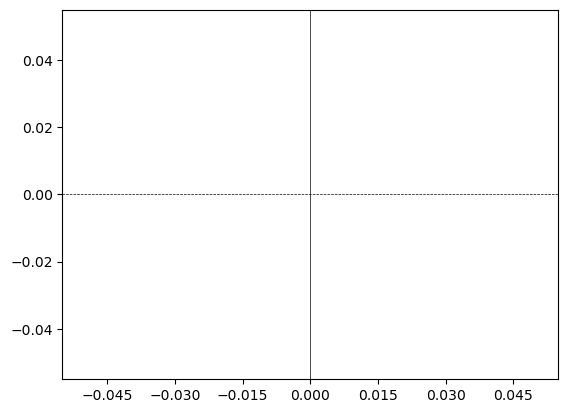

In [15]:
event.plot(AR=True)
plt.show()

In [16]:
event.results()

,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-10,NaN,NaN,nan,NaN,NaN,NaN
-9,NaN,NaN,nan,NaN,NaN,NaN
-8,NaN,NaN,nan,NaN,NaN,NaN
-7,NaN,NaN,nan,NaN,NaN,NaN
-6,NaN,NaN,nan,NaN,NaN,NaN
-5,NaN,NaN,nan,NaN,NaN,NaN
-4,NaN,NaN,nan,NaN,NaN,NaN
-3,NaN,NaN,nan,NaN,NaN,NaN
-2,NaN,NaN,nan,NaN,NaN,NaN
-1,NaN,NaN,nan,NaN,NaN,NaN


# 筛选 5 只医药股（随机）

In [17]:
rawCompanyData=pd.read_csv("stockData/rawCompanyDataInTushare.csv")
print(rawCompanyData['industry'].unique())
rawMedicCompanyData=rawCompanyData[rawCompanyData['industry']=='医疗保健']['ts_code'].values.tolist()
rawMedicCompanyData=[i for i in rawMedicCompanyData if i in afterColumnChanged.columns]
# rawMedicCompanyData=[i for i in rawMedicCompanyData if (i !='000504.SZ' and i!='000615.SZ')][:5]
# rawMedicCompanyData=[i for i in rawMedicCompanyData if (i !='000504.SZ')][:5]
rawMedicCompanyData=[i for i in rawMedicCompanyData if not afterColumnChanged[i].isnull().values.any()][:5]
# rawMedicCompanyData=['000001.SZ','000002.SZ']
rawMedicCompanyData

['银行' '全国地产' '软件服务' '环境保护' '区域地产' '其他商业' '运输设备' '电气设备' '建筑工程' '玻璃' '家用电器'
 '服饰' '农业综合' '元器件' '水泥' '汽车服务' '火力发电' '医药商业' '汽车配件' '综合类' '新型电力' '多元金融'
 '装修装饰' '房产服务' '商品城' '石油加工' '铅锌' '通信设备' 'IT设备' '港口' '机场' '石油贸易' '空运'
 '生物制药' '商贸代理' '化学制药' '影视音像' '工程机械' '证券' '化纤' '供气供热' '农药化肥' '机床制造' '百货'
 '中成药' '酒店餐饮' '路桥' '旅游景点' '造纸' '医疗保健' '食品' '黄金' '化工原料' '专用机械' '水运' '日用化工'
 '旅游服务' '文教休闲' '出版业' '机械基件' '汽车整车' '煤炭开采' '铁路' '染料涂料' '白酒' '农用机械' '林业'
 '水务' '水力发电' '互联网' '广告包装' '铝' '其他建材' '批发业' '保险' '小金属' '铜' '普钢' '航空' '饲料'
 '特种钢' '种植业' '焦炭加工' '纺织' '啤酒' '超市连锁' '钢加工' '矿物制品' '渔业' '软饮料' '化工机械' '塑料'
 '红黄酒' '仓储物流' '家居用品' '摩托车' '石油开采' '轻工机械' '电器仪表' '半导体' '乳制品' '纺织机械' '电器连锁'
 '陶瓷' '橡胶' '公路' '公共交通' '船舶' nan '电信运营' '园区开发']


[]

In [18]:
##todo：时间点：2020/1/20，2020/2/3
eventTime=['2020-12-20','2020-3-20']
# eventTime=['2020-1-20']
def createEventTime(eventTime,security_ticker,market_ticker):
    final=pd.DataFrame()
    for event in eventTime:
        for ticker in security_ticker:
            thisLine=pd.DataFrame({"security_ticker":[ticker],"market_ticker":[market_ticker],"event_date":[event]})
            final=pd.concat([final,thisLine])
    return final

medicEventData=createEventTime(eventTime,rawMedicCompanyData,"000004.SZ")
medicEventData

""


In [19]:
##导出
medicEventData.to_csv("eventStudyData/timeLineData/medicHeadData.csv",index=False)

# 筛选 5 只旅游股（随机）

In [20]:
rawTravelCompanyData=rawCompanyData[rawCompanyData['industry']=='旅游服务']['ts_code'].values.tolist()[:5]
rawTravelCompanyData

['000524.SZ', '000610.SZ', '000796.SZ', '002159.SZ', '002707.SZ']

In [21]:
travelEventData=createEventTime(eventTime,rawTravelCompanyData,"SPY")
travelEventData

,security_ticker,market_ticker,event_date
0,000524.SZ,SPY,2020-12-20
0,000610.SZ,SPY,2020-12-20
0,000796.SZ,SPY,2020-12-20
0,002159.SZ,SPY,2020-12-20
0,002707.SZ,SPY,2020-12-20
0,000524.SZ,SPY,2020-3-20
0,000610.SZ,SPY,2020-3-20
0,000796.SZ,SPY,2020-3-20
0,002159.SZ,SPY,2020-3-20
0,002707.SZ,SPY,2020-3-20


In [22]:
# travelEventData.to_csv("eventStudyData/timeLineData/travelHeadData.csv",index=False)

# 合并

In [23]:
combine=pd.concat([travelEventData,medicEventData])
# combine.to_csv("eventStudyData/timeLineData/combineData.csv",index=False)
combine

,security_ticker,market_ticker,event_date
0,000524.SZ,SPY,2020-12-20
0,000610.SZ,SPY,2020-12-20
0,000796.SZ,SPY,2020-12-20
0,002159.SZ,SPY,2020-12-20
0,002707.SZ,SPY,2020-12-20
0,000524.SZ,SPY,2020-3-20
0,000610.SZ,SPY,2020-3-20
0,000796.SZ,SPY,2020-3-20
0,002159.SZ,SPY,2020-3-20
0,002707.SZ,SPY,2020-3-20


# 开始测试 multiple class 接口

In [24]:
afterColumnChanged.loc["2019-12-02":"2020-1-30"][['000615.SZ','000004.SZ']]

,000615.SZ,000004.SZ
date,,
2020-01-23,-4.7847,-3.7131
2020-01-22,-3.6866,0.6369
2020-01-21,-1.8100,0.9430
2020-01-20,0.2268,4.9011
2020-01-17,-0.4515,-0.9795
2020-01-16,-1.9912,-0.3991
2020-01-15,-1.3100,-1.9565
2020-01-14,0.0000,-0.1303
2020-01-13,0.2188,3.1348


In [25]:
for index, row in afterColumnChanged.iterrows():
    if np.isnan(row['000615.SZ']):
        print("null date: ",index)

null date:  2020-04-07 00:00:00
null date:  2018-06-28 00:00:00
null date:  2018-06-27 00:00:00
null date:  2018-06-26 00:00:00
null date:  2018-06-25 00:00:00
null date:  2018-06-22 00:00:00
null date:  2018-06-21 00:00:00
null date:  2018-06-20 00:00:00
null date:  2018-06-19 00:00:00
null date:  2018-06-15 00:00:00
null date:  2018-06-14 00:00:00
null date:  2018-01-09 00:00:00
null date:  2018-01-08 00:00:00
null date:  2018-01-05 00:00:00
null date:  2018-01-04 00:00:00
null date:  2018-01-03 00:00:00
null date:  2018-01-02 00:00:00
null date:  2017-12-29 00:00:00
null date:  2017-12-28 00:00:00
null date:  2017-12-27 00:00:00
null date:  2017-12-26 00:00:00
null date:  2017-11-07 00:00:00
null date:  2017-11-06 00:00:00
null date:  2017-11-03 00:00:00
null date:  2017-11-02 00:00:00
null date:  2017-11-01 00:00:00
null date:  2017-10-31 00:00:00
null date:  2017-10-30 00:00:00
null date:  2017-10-27 00:00:00
null date:  2017-10-26 00:00:00
null date:  2017-10-25 00:00:00
null dat

In [26]:
agg = es.Multiple.from_csv(
    path = 'eventStudyData/timeLineData/medicHeadData.csv',
    event_study_model = es.Single.market_model,
    event_window = (-10,+10),
    date_format = "%Y-%m-%d",
    ignore_errors=False,
)
agg.results()

EmptyDataError: No columns to parse from file